In [1]:
import datetime as dt
import random
import re

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook+plotly_mimetype"
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
charts = pd.read_pickle('alltime_top_100')

## Data Handling and Feature Engineering

In [34]:
# Delete duplicates
charts.drop_duplicates(keep='first',inplace=True)

In [35]:
# Convert start_date and end_date to datetime objects
charts['start_date']= pd.to_datetime(charts['start_date'], format='%d.%m.%Y')
charts['end_date']= pd.to_datetime(charts['end_date'], format='%d.%m.%Y')

In [36]:
# Convert position into dtype int
charts['position'] = charts['position'].astype(int)

In [37]:
# Add column week
charts['week'] = charts['start_date'].dt.week

In [38]:
# Add column year
charts['year'] = charts['start_date'].dt.year

In [39]:
# Add column decade
charts.loc[charts['year'] < 2020, 'decade'] = '2010s'
charts.loc[charts['year'] < 2010, 'decade'] = '2000s'
charts.loc[charts['year'] < 2000, 'decade'] = '1990s'
charts.loc[charts['year'] < 1990, 'decade'] = '1980s'
charts.loc[charts['year'] < 1980, 'decade'] = '1970s'

In [40]:
# Add combination of artist and song (easier for plotting purposes later)
charts['artist_song'] = charts['artist'] + ' - ' + charts['song']

In [41]:
# Determine primary and feature artist
charts['primary_artist'] = charts.loc[:, 'artist'].str.split(r" feat. | feat | x ", expand=True)[0]
charts['feature_artist'] = charts.loc[:, 'artist'].str.split(r" feat. | feat | x ", expand=True)[1]

In [42]:
# Add column with alltime and yearly peak position of the song
charts['alltime_peak'] = charts.groupby(['artist_song'])['position'].transform('min')
charts['yearly_peak'] = charts.groupby(['year', 'artist_song'])['position'].transform('min')

In [43]:
# Add column to mark if a song was ever in the top10
charts.loc[charts['alltime_peak'] <= 10, 'top10'] = 1
charts.loc[charts['alltime_peak'] > 10, 'top10'] = 0

In [44]:
charts.head()

artist                                   song  \
0                          Bro'Sis                              I Believe   
1                     Sarah Connor                   From Sarah With Love   
2                      Stefan Raab                            Wir kiffen!   
3  Robbie Williams & Nicole Kidman                       Somethin' Stupid   
4                 Melanie Thornton  Wonderful Dream (Holidays Are Coming)   

                     label  position start_date   end_date  week  year decade  \
0  Cheyenne/Zeitgeist-Pol.         1 2001-12-24 2002-01-06    52  2001  2000s   
1              X-Cell-Epic         2 2001-12-24 2002-01-06    52  2001  2000s   
2                     Rare         3 2001-12-24 2002-01-06    52  2001  2000s   
3                Chrysalis         4 2001-12-24 2002-01-06    52  2001  2000s   
4              X-Cell-Epic         5 2001-12-24 2002-01-06    52  2001  2000s   

                                         artist_song  \
0                                Bro'Sis - I Believe   
1                Sarah Connor - From Sarah With Love   
2                          Stefan Raab - Wir kiffen!   
3  Robbie Williams & Nicole Kidman - Somethin' St...   
4  Melanie Thornton - Wonderful Dream (Holidays A...   

                    primary_artist feature_artist  alltime_peak  yearly_peak  \
0                          Bro'Sis           None             1            1   
1                     Sarah Connor           None             1            1   
2                      Stefan Raab           None             3            3   
3  Robbie Williams & Nicole Kidman           None             2            4   
4                 Melanie Thornton           None             3            5   

   top10  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0

In [58]:
# Add column for One-Hit-Wonders
test = charts.loc[charts['alltime_peak'] == 1, ['primary_artist', 'song']].drop_duplicates()
test.groupby('primary_artist').count().sort_values('song', ascending=False)

song
primary_artist                  
Capital Bra                   14
Boney M.                       7
Modern Talking                 5
Sarah Connor                   5
David Guetta                   4
...                          ...
Höhner                         1
Hanson                         1
HIM                            1
Guillermo Marchena             1
will.i.am & Britney Spears     1

[409 rows x 1 columns]

In [59]:
# sort values by start date and position
charts.sort_values(['start_date', 'position'], ignore_index=True, inplace=True)

In [60]:
charts.tail(10)

artist  \
201940                                     Frank Sinatra   
201941                                       Band Aid 30   
201942                     Shawn Mendes & Camila Cabello   
201943                                       Tim Bendzko   
201944     Eartha Kitt with Henri René and his Orchestra   
201945                                     Michael Bublé   
201946                                        Apache 207   
201947                    The Cratez, Luciano & Kontra K   
201948  The Kingdom Choir feat. Camélia Jordana & Namika   
201949                                          Boney M.   

                                       song               label  position  \
201940        Santa Claus Is Coming To Town    SME - Sony Music        91   
201941  Do They Know It's Christmas? (2014)                 EMI        92   
201942                             Señorita              Island        93   
201943                                 Hoch  SME - Jive Germany        94   
201944                           Santa Baby      SME - Columbia        95   
201945        Santa Claus Is Coming To Town             Reprise        96   
201946                          Sex mit dir     SME - Two Sides        97   
201947                          Himmel grau           SME - RBK        98   
201948                  Holidays Are Coming    SME - Sony Music        99   
201949        Mary's Boy Child / Oh My Lord    SME - Sony Music       100   

       start_date   end_date  week  year decade  \
201940 2019-12-27 2020-01-02    52  2019  2010s   
201941 2019-12-27 2020-01-02    52  2019  2010s   
201942 2019-12-27 2020-01-02    52  2019  2010s   
201943 2019-12-27 2020-01-02    52  2019  2010s   
201944 2019-12-27 2020-01-02    52  2019  2010s   
201945 2019-12-27 2020-01-02    52  2019  2010s   
201946 2019-12-27 2020-01-02    52  2019  2010s   
201947 2019-12-27 2020-01-02    52  2019  2010s   
201948 2019-12-27 2020-01-02    52  2019  2010s   
201949 2019-12-27 2020-01-02    52  2019  2010s   

                                              artist_song  \
201940      Frank Sinatra - Santa Claus Is Coming To Town   
201941  Band Aid 30 - Do They Know It's Christmas? (2014)   
201942           Shawn Mendes & Camila Cabello - Señorita   
201943                                 Tim Bendzko - Hoch   
201944  Eartha Kitt with Henri René and his Orchestra ...   
201945      Michael Bublé - Santa Claus Is Coming To Town   
201946                           Apache 207 - Sex mit dir   
201947       The Cratez, Luciano & Kontra K - Himmel grau   
201948  The Kingdom Choir feat. Camélia Jordana & Nami...   
201949           Boney M. - Mary's Boy Child / Oh My Lord   

                                       primary_artist  \
201940                                  Frank Sinatra   
201941                                    Band Aid 30   
201942                  Shawn Mendes & Camila Cabello   
201943                                    Tim Bendzko   
201944  Eartha Kitt with Henri René and his Orchestra   
201945                                  Michael Bublé   
201946                                     Apache 207   
201947                 The Cratez, Luciano & Kontra K   
201948                              The Kingdom Choir   
201949                                       Boney M.   

                  feature_artist  alltime_peak  yearly_peak  top10  
201940                      None            85           91    0.0  
201941                      None             2           92    1.0  
201942                      None             1            1    1.0  
201943                      None            10           10    1.0  
201944                      None            73           95    0.0  
201945                      None            66           96    0.0  
201946                      None            13           13    0.0  
201947                      None            11           11    0.0  
201948  Camélia Jordana & Namika            99           9

## Top Artists

In [61]:
# Number of times an artist appears in the charts for the year
counts = charts['artist'].value_counts().rename_axis('artist').reset_index(name='counts')


# Limit number of artists to the ones appearing more than 250 ones
top_artists = counts[counts['counts'] >= 250]

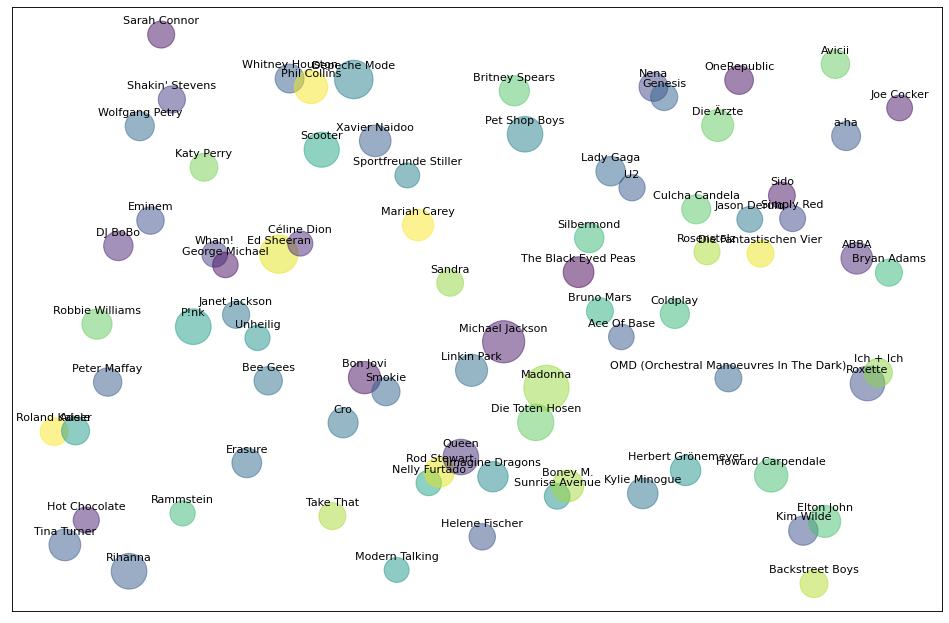

In [62]:
#Draw plot
plt.figure(figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

top_artists = top_artists.sample(frac=1)       # randomize position on the x-axis

x = top_artists['artist']
y = np.random.rand(len(x))                     # randomize position on the y-axis
colors = np.random.rand(len(x))                # randomize colors

plt.scatter(x, y,
            marker='o',
            s=top_artists['counts']*2,        # marker size depends on the number of times artist appears
            alpha=0.5,
            c=colors)


# Label points with artist name, called for each point
for i,j in zip(x,y):
    label = i
    plt.annotate(label,                        # this is the text
                 (i,j),                        # this is the point to label
                 textcoords="offset points",   # how to position the text
                 xytext=(0,10),                # distance from text to points (x,y)
                 ha='center')                  # horizontal alignment can be left, right or center

plt.xticks([], [])
plt.yticks([], [])

plt.show()

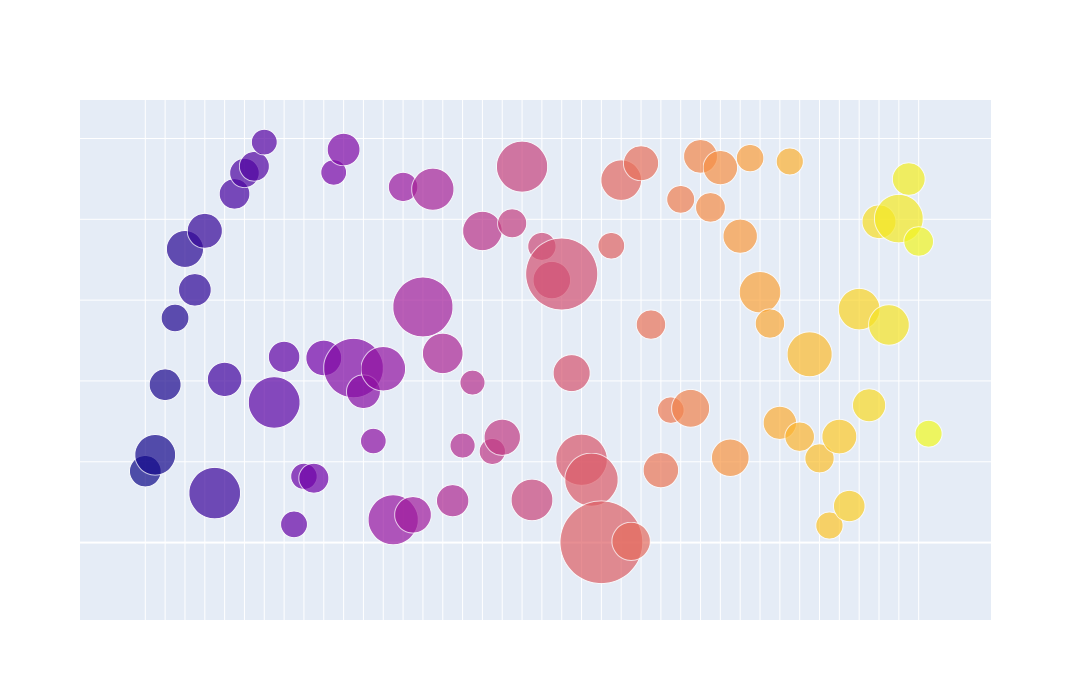

In [63]:
import plotly.graph_objects as go

c = list(range(len(x)))

fig = go.Figure(data=go.Scatter(
    x=top_artists['artist'],
    y=np.random.rand(len(x)),
    mode='markers',
    marker=dict(size=top_artists['counts']/10,
                color=c),
    hovertext=top_artists['artist'],
    hoverinfo="text"
))

fig.update_layout(
    xaxis = dict(showticklabels=False),
    yaxis = dict(showticklabels=False),
    width=1000,
    height=700
)

fig.show()

## Songs by Artist

In [64]:
# Function to see development of all songs by one artist during the year

def info_artist(artist_name):
    # Filter dataframe by requested artist
    df = charts[charts['artist'].str.contains(artist_name)].sort_values(by='start_date').copy()  #also includes features
    # Select all songs by artist
    tracks = df.song.unique()
    
    plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    
    # Draw plot for each track
    for track in tracks:
        x = df[df['song'] == track]['start_date']
        y = df[df['song'] == track]['position']
        plt.scatter(x, y,
                    marker='o',
                    s=1000-y*10,   # marker size depends on the position of the track in the charts
                    alpha=.5,
                    label=track)

    plt.yticks(np.array([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))
    plt.title('Information for {}'.format(df['artist'].unique()))
    plt.legend(numpoints=1)

    ax = plt.gca()
    ax.invert_yaxis()

    plt.show()

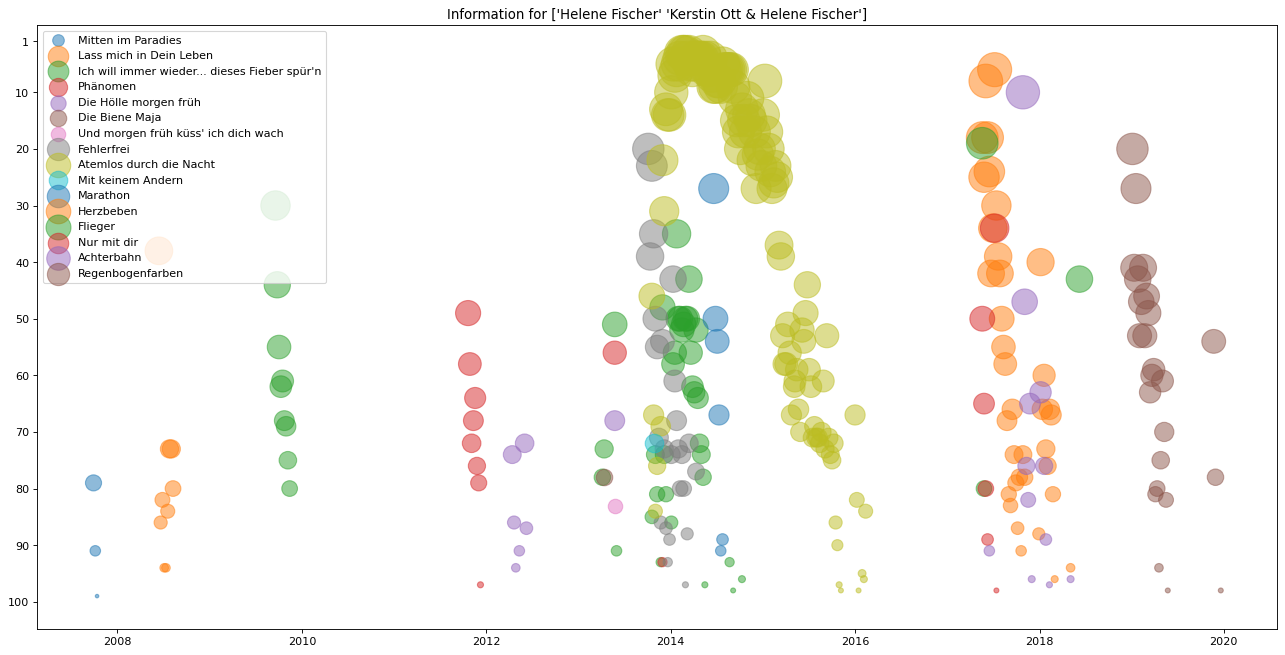

In [85]:
# Example
info_artist("Helene Fischer")

## No.1 Songs

#### No.1 Songs during Period

In [71]:
def info_no1(start_year=2019, end_year=2020):
    # find No.1 songs of the particular year
    df = charts[(charts['year'] >= start_year) & (charts['year'] <= end_year)]
    
    # all songs that were at least one week No.1
    ones = df['yearly_peak'] == 1
    ones_other = df[ones].sort_values(['position', 'start_date'])
    
    # songs at the moment they were No.1
    peak_position = df['position'] == 1
    peaks = df[peak_position]
    
    # Determine limits for x-axis
    min_date = ones_other.start_date.min()
    max_date = ones_other.end_date.max()
    
    # Determine required size of graph
    w = 20
    l = ones_other['artist_song'].nunique() / 2

    # Draw plot
    fig, ax = plt.subplots(figsize=(w,l), dpi= 80)
    ax.hlines(y=ones_other['artist_song'], xmin=min_date, xmax=max_date, color='gray', alpha=0.3, linewidth=0.5, linestyles='dashdot')
    ax.scatter(y=peaks['artist_song'], x=peaks['start_date'], color='#0e668b', s=75)
    ax.scatter(y=ones_other['artist_song'], x=ones_other['start_date'], s=75, color='#a3c4dc', alpha=0.3)

    # Title
    ax.set_title('No.1 songs between {} and {}'.format(start_year, end_year), fontdict={'size':30})
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    plt.show()

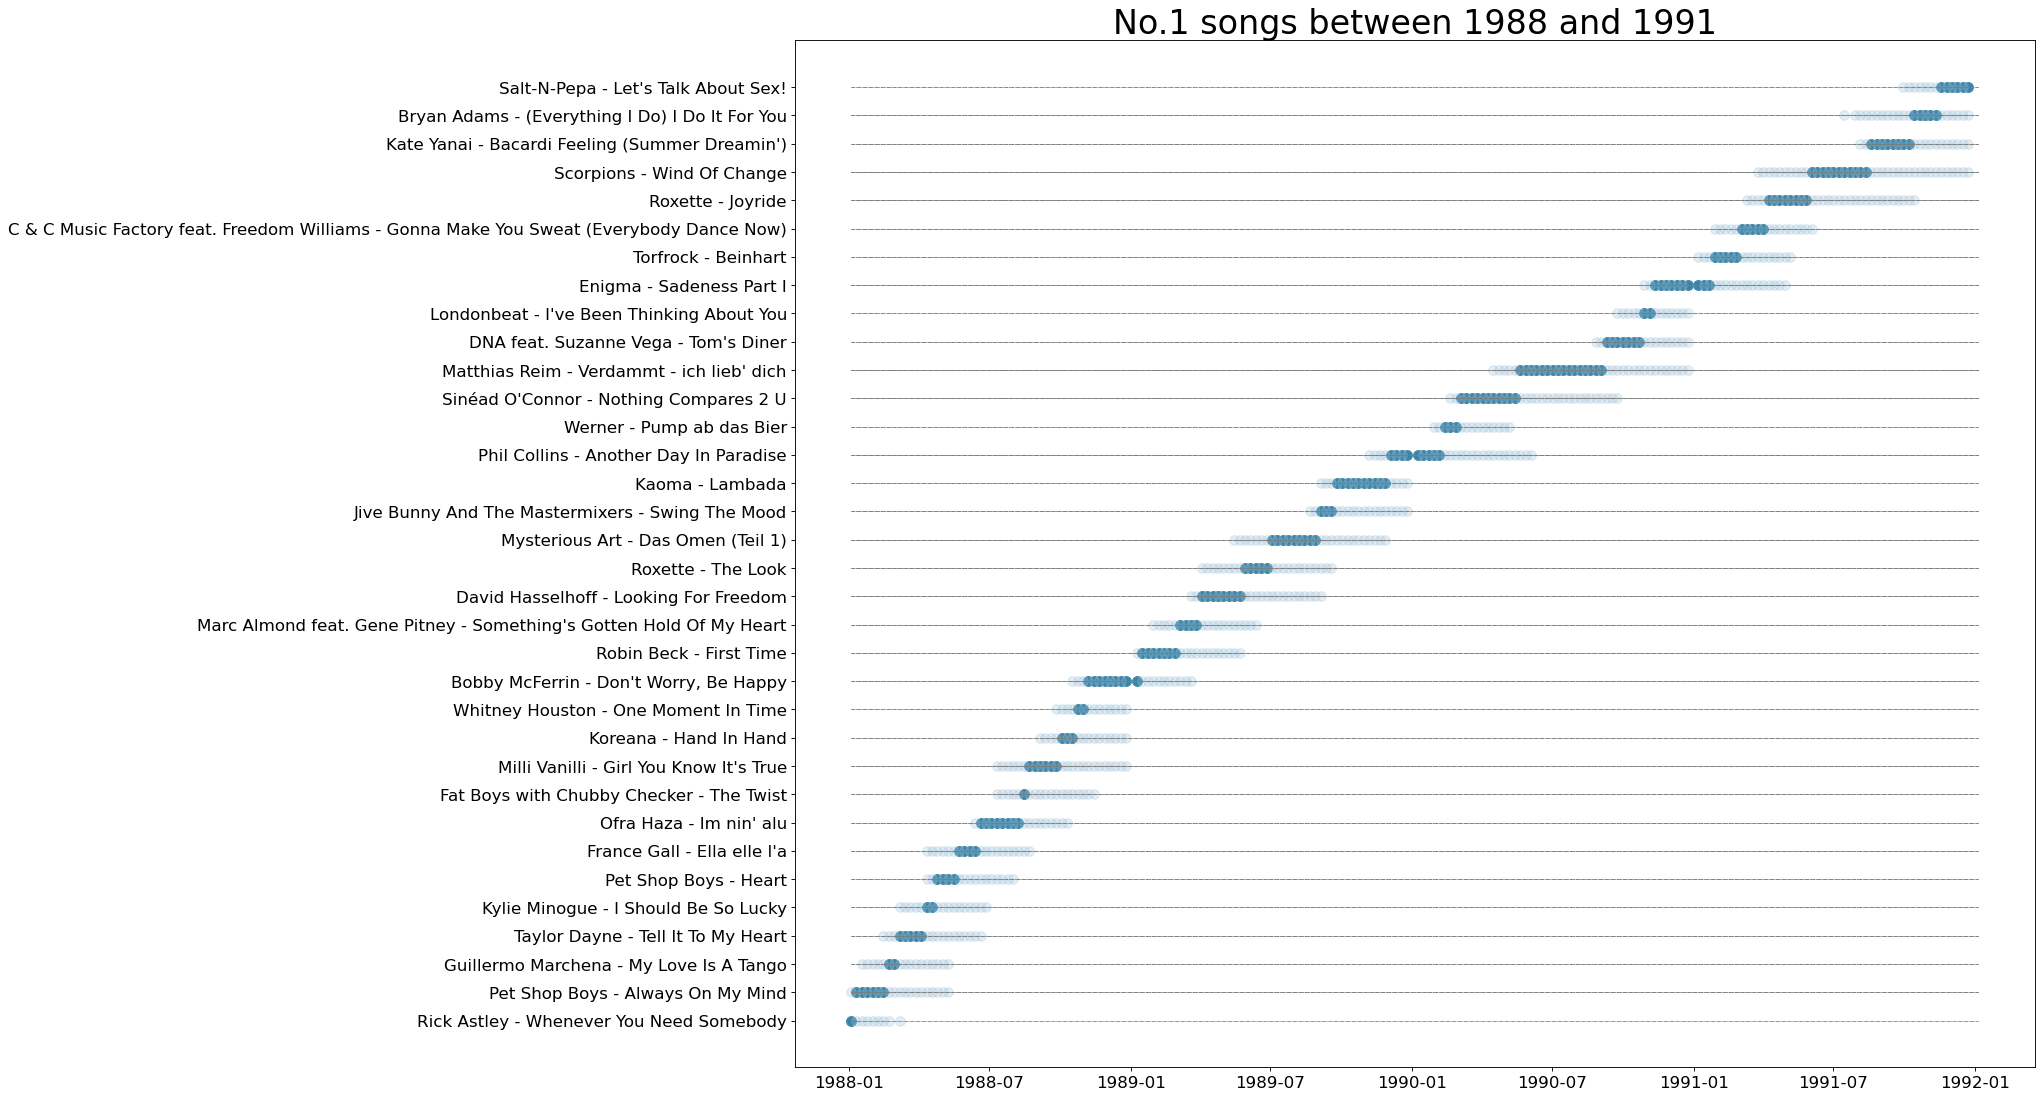

In [81]:
info_no1(1988, 1991)

#### No.1 weeks in charts

In [82]:
def weeks_in_charts(start_year=2019, end_year=2019):
    # find No.1 songs of the particular year
    df = charts[(charts['year'] >= start_year) & (charts['year'] <= end_year)]
    
    # all songs that were at least one week No.1
    ones = df['yearly_peak'] == 1
    
    # songs at the moment they were No.1
    peak_position = df['position'] == 1
    
    # Number of weeks song was in Top100
    weeks_top100 = df[ones].groupby(['artist_song'], as_index=False).count()[['artist_song', 'week']]

    # Number of weeks song was on No.1
    weeks_no1 = df[peak_position].groupby(['artist_song'], as_index=False).count()[['artist_song', 'week']]

    # Create dataframe
    weeks = weeks_top100.merge(weeks_no1, how='left', on='artist_song')
    weeks.columns = ['artist_song', 'weeks_in_charts', 'weeks_on_one']
    weeks.sort_values(by=['weeks_in_charts'], inplace=True)
    
    # Determine required size of graph
    w = 20
    l = len(weeks) / 4
    
    # Draw plot
    fig, ax = plt.subplots(1,1,figsize=(w,l), facecolor='#f7f7f7', dpi= 80)

    # Plot weeks in charts
    plt.hlines(y=weeks['artist_song'], xmin=0, xmax=weeks['weeks_in_charts'], color='#a3c4dc')
    plt.plot(weeks['weeks_in_charts'], weeks['artist_song'], ">", color='#0e668b')

    # Plot weeks on 1
    plt.hlines(y=weeks['artist_song'], xmin=0, xmax=weeks['weeks_on_one'], color='#dcbba3')
    plt.plot(weeks['weeks_on_one'], weeks['artist_song'], ">", color='#8b330e')

    ax.set_facecolor('#f7f7f7')
    ax.set_xlabel('weeks in charts', fontsize=10)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    plt.figtext(0.75, 0.15, "red:  weeks on No.1\nblue: weeks in Top 100", ha="left", fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

    plt.show()

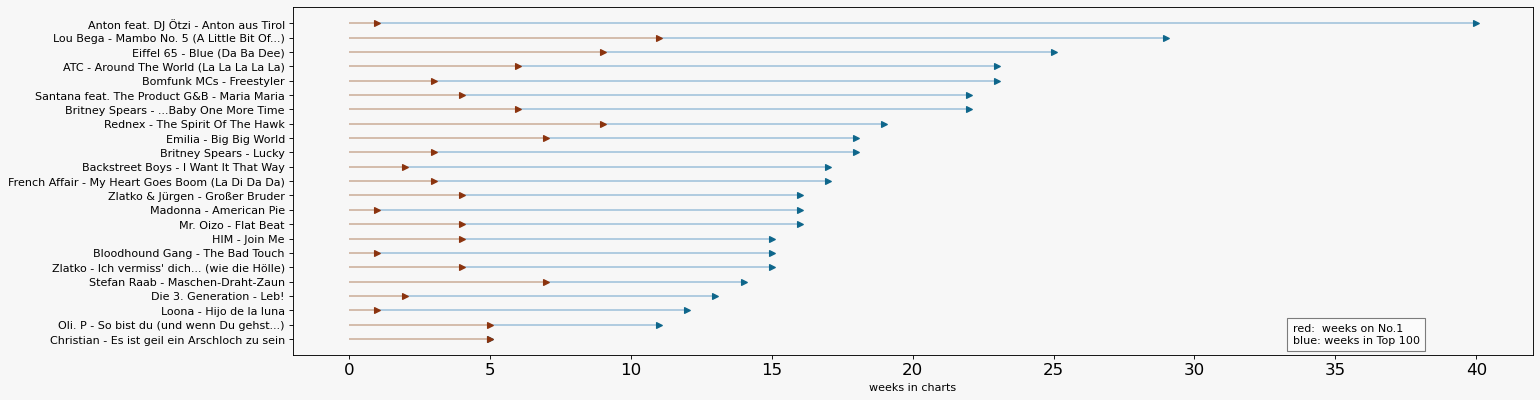

In [83]:
weeks_in_charts(1999, 2000)

## Song Titles

In [84]:
import itertools
import collections
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# removing special characters
special_characters = ['!', '?', '#', '/', '(', ')', '&', '%', '$', '*', '+']
title = charts.song

for char in special_characters:
    title = title.str.replace(char, '')

In [ ]:
# extract words from song titles
#words_in_title = [song.lower().split() for song in title.unique()]     # for words in unique titles
words_in_title = [song.lower().split() for song in title]               # for words in titles depending appearance in charts
words_in_title[:5]

In [ ]:
# List of all words across title
all_words = list(itertools.chain(*words_in_title))

# Create counter
count_words = collections.Counter(all_words)

# Remove stopwords
stop_words = STOPWORDS

# Add Christmas to stopword
stop_words.update(['christmas', 'ich', 'du', 'er', 'sie', 'es', 'wir', 'ihr', 'der', 'die', 'das', 'mich', 'dich', \
                   'uns', 'ist', 'ein', 'nicht', 'man', 'von', 'da', 'mit', 'dir', 'im', 'den', 'dem', 'mir', 'bist', \
                   'wie', 'zu', 'aus', 'bin', 'auf', 'mein', 'und'])

titles_nsw = [[word for word in title_words if not word in stop_words]
              for title_words in words_in_title]

all_words = list(itertools.chain(*titles_nsw))

# count word without stopword
counts_nsw = collections.Counter(all_words)

# Top ten most used words
counts_nsw.most_common(10)

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(
                max_font_size=180,
                max_words=200,
                stopwords=stop_words,
                background_color="white",
                width=800,
                height=400
                ).fit_words(counts_nsw)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Uncomment to save image
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

# Save the image in the img folder:
#wordcloud.to_file("2019_titles.png")

In [ ]:
#charts[charts['song'].str.contains('Christmas')].groupby(['song']).max().sort_values(by='position', ascending=True)

## Artists

In [ ]:
charts.head()

In [ ]:
top10 = charts[charts['top10'] == 1]
top10_artist = top10.groupby(['artist', 'song']).count().groupby(['artist']).count()[['top10']]
top10_artist[top10_artist['top10']>=3].plot(kind='barh', figsize=(10, 8))

In [ ]:
charts['artist_song'].nunique()

In [ ]:
charts[charts['artist'].str.contains(' x ')].groupby(['song']).max().sort_values(by='position', ascending=True).head(20)